In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utilities import *

In [3]:
pin = read_pin("../Data/pin.csv")

In [4]:
test_pin = read_pin("../Data/testPin.csv")

In [5]:
ble = read_ble("../Data/ble.csv")

In [6]:
data = read_data("../Data/rssi5.csv")

All beacons: ['0117C55D14E4']
Selecting all


In [7]:
data.sort_values("time", inplace=True)

In [8]:
data = data.groupby("location").rolling(15, min_periods=1).mean().reset_index()

In [9]:
data = data.set_index("location").groupby("location").ffill()
data.fillna(-100, inplace=True)
data.reset_index(inplace=True)

In [10]:
data

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,30171,-100.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-89.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,V1_10,30172,-100.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-82.0,-100.000000,-100.0,-100.0,-89.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
2,V1_10,30173,-68.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-82.0,-100.000000,-100.0,-100.0,-89.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,V1_10,30174,-68.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-82.0,-84.000000,-100.0,-100.0,-89.0,-100.0,-100.0,-75.0,-100.0,-100.0,-100.0
4,V1_10,30175,-68.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-82.0,-84.000000,-100.0,-100.0,-89.0,-100.0,-66.0,-75.0,-100.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49658,V1_9,43166,-77.0,-83.0,-78.0,-62.333333,-71.0,-87.0,-92.0,-62.500000,-91.0,-89.0,-89.0,-67.0,-72.0,-71.5,-76.0,-92.0,-75.0
49659,V1_9,43167,-77.0,-83.0,-78.0,-62.500000,-71.0,-87.0,-92.0,-62.500000,-91.0,-89.0,-89.0,-67.0,-72.0,-71.5,-76.0,-93.0,-75.0
49660,V1_9,43168,-77.0,-83.0,-78.0,-62.500000,-71.0,-87.0,-92.0,-62.500000,-91.0,-89.0,-89.0,-67.0,-72.5,-71.5,-76.0,-93.0,-75.0
49661,V1_9,43169,-77.0,-83.0,-78.0,-62.500000,-71.0,-87.0,-92.0,-62.666667,-91.0,-89.0,-89.0,-67.0,-73.0,-71.5,-76.0,-93.0,-75.0


In [11]:
img = np.zeros((17, 34), dtype=np.uint8)

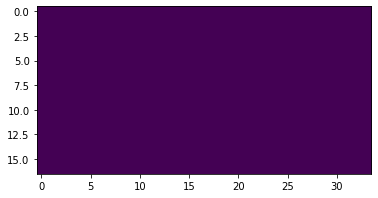

In [12]:
plt.imshow(img)

In [13]:
locations = data['location'].unique()
locations

array(['V1_10', 'V1_11', 'V1_12', 'V1_13', 'V1_14', 'V1_18', 'V1_19',
       'V1_20', 'V1_21', 'V1_22', 'V1_23', 'V1_24', 'V1_26', 'V1_27',
       'V1_28', 'V1_29', 'V1_30', 'V1_31', 'V1_32', 'V1_8', 'V1_9'],
      dtype=object)

In [14]:
scanners

['C400A2E19293',
 'CD4533FFC0E1',
 'D2B6503554D7',
 'DB8B36A69C56',
 'DD697EA75B68',
 'DF231643E227',
 'E13B805C6CB0',
 'E43355CA8B96',
 'E6D9D20DD197',
 'E8FD0B453DC4',
 'E96AF2C858BA',
 'EC72840D9AD3',
 'F1307ECB3B90',
 'F1EDAF28E08A',
 'F69A86823B96',
 'FB2EE01C18CE',
 'FDAE5980F28C']

In [26]:
def convert_to_image(index, loc, x, train=True):
    img = np.zeros((17, 34), dtype=np.uint8)
    for i in range(len(scanners)):
        scanner = scanners[i]
        sX = int(ble[scanner]['X'])
        sY = int(ble[scanner]['Y'])
        img[sY, sX] = int((x[i] + 100) * 256.0 / 60.0)
    if train:
        res = cv2.imwrite("../Data/train_images/{}/{}_{}.png".format(loc, loc, index), img)
    else:
        res = cv2.imwrite("../Data/test_images/{}/{}_{}.png".format(loc, loc, index), img)

def save_as_images(data, location, train=True):
    data = data[data['location'] == location][scanners]
    for i in range(data.shape[0]):
        convert_to_image(i, location, data.iloc[i], train)

In [16]:
for loc in locations:
    save_as_images(data, loc)

In [17]:
img = cv2.imread("../Data/train_images/V1_8/V1_8_15.png")

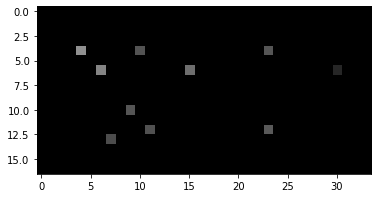

In [18]:
plt.imshow(img)

In [19]:
test_data = read_data("../Data/testRssi.csv")

All beacons: ['0117C55D14E4']
Selecting all


In [20]:
test_data.sort_values("time", inplace=True)

In [21]:
test_data = test_data.groupby("location").rolling(15, min_periods=1).mean().reset_index()

In [22]:
test_data = test_data.set_index("location").groupby("location").ffill()
test_data.fillna(-100, inplace=True)
test_data.reset_index(inplace=True)

In [23]:
test_data

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,T1_1,0,-100.0,-75.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-100.0,-100.0,-100.0
1,T1_1,1,-100.0,-75.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-68.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-100.0,-100.0,-100.0
2,T1_1,2,-100.0,-75.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-68.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-100.0,-84.0,-100.0
3,T1_1,3,-100.0,-75.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-68.0,-100.0,-68.0,-100.000000,-100.0,-100.0,-100.0,-84.0,-100.0
4,T1_1,4,-100.0,-75.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-68.0,-100.0,-67.0,-100.000000,-100.0,-100.0,-100.0,-84.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8453,T1_9,4884,-68.0,-71.5,-77.0,-77.0,-65.0,-77.0,-83.0,-73.5,-95.0,-77.0,-86.0,-58.500000,-57.0,-82.0,-74.0,-91.0,-80.0
8454,T1_9,4885,-68.0,-71.5,-77.0,-77.0,-65.0,-77.0,-83.0,-73.5,-95.0,-77.0,-86.0,-57.333333,-57.0,-82.0,-74.0,-91.0,-80.0
8455,T1_9,4886,-68.0,-71.5,-77.0,-77.0,-65.0,-77.0,-83.0,-73.0,-95.0,-77.0,-82.0,-57.333333,-57.0,-82.0,-74.0,-91.0,-80.0
8456,T1_9,4887,-68.0,-73.0,-77.0,-77.0,-65.0,-77.0,-83.0,-73.0,-95.0,-77.0,-82.0,-58.250000,-57.0,-82.0,-74.0,-91.0,-80.0


In [24]:
locations = test_data['location'].unique()
locations

array(['T1_1', 'T1_10', 'T1_11', 'T1_12', 'T1_13', 'T1_14', 'T1_15',
       'T1_16', 'T1_2', 'T1_3', 'T1_4', 'T1_5', 'T1_6', 'T1_7', 'T1_8',
       'T1_9'], dtype=object)

In [25]:
for loc in locations:
    save_as_images(test_data, loc, train=False)